In [2]:
import cdsapi
import climetlab as cml
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import geopy
import xarray as xr
import pandas as pd

import csv
import os
import pickle

import scipy
import sklearn 
from sklearn.cluster import KMeans

import seaborn as sns

In [3]:
def read_table_v2():
    ft = pd.read_csv("../tables/state_regularized_v2.csv")
    for row in ft.iterrows():
        print(row[1]['State'])
    return ft

ft = read_table_v2()

nan
Oklahoma
Missouri
Michigan
New York
Florida
Louisiana
California
Connecticut
Arkansas
Virginia
California
California
Pennsylvania
Pennsylvania
North Carolina
Michigan
New York
North Carolina
Georgia
MichigaDIRTY
Wisconsin
Michigan
Indiana, Ohio
Illinois
Illinois
Ohio
Virginia
Texas
Pennsylvania
Maryland
Maryland
North Carolina, Virginia
North Carolina
Maryland
Pennsylvania, Maryland, Virginia
North Carolina
Maryland
All PPL includingDIRTY
California
Maryland, Virginia
Illinois
Michigan
Michigan
Maryland
Virginia
New York
Washington
Eastern portions of King County and Pierce CountyDIRTY
California
California
California
King CountyDIRTY
North Carolina, South Carolina
South Carolina
Georgia
Maryland
Pennsylvania, Maryland, Virginia
California
California
Georgia
Texas
North Carolina, South Carolina
Texas
Florida
Washington
California
Texas
Michigan
MichigaDIRTY
Michigan
West Virginia, Pennsylvania, Maryland, Virginia
Ohio
Ohio
Texas
Oklahoma
Louisiana
Nebraska
Alabama, Georgia
Virginia

In [14]:
def get_event(state,date):
    sd = date.split("-")
    month = sd[0]
    day = sd[1]
    year = sd[2]
    means = xr.open_dataset('../../a/state_means/global_mean.nc')
    x = xr.open_dataset('../../a/era5_data/' + date + '.nc')

    currLocation = geopandas.tools.geocode(state)
    lat = currLocation.geometry.y.values[0]
    lon = currLocation.geometry.x.values[0] + 360.

    # print(currLocation)

    # print(means)

    state_mean = means.sel(latitude=slice(lat+2.5,lat-2.5), longitude=slice(lon-2.5,lon+2.5),time= year + '-' + month + '-01')
    # print(state_mean.sf)
    locate =  x.sel(latitude=slice(lat+2.5,lat-2.5), longitude=slice(lon-2.5,lon+2.5), time=year + '-' + month + '-' + day + '-' + 'T12:00:00')
    # locate.t2m.plot()
    locate.tp.plot()
    # print(locate.tp)

    # cartopy

In [5]:
def raw_event_data(state,date):
    state_mean, locate = get_event(state,date)
    


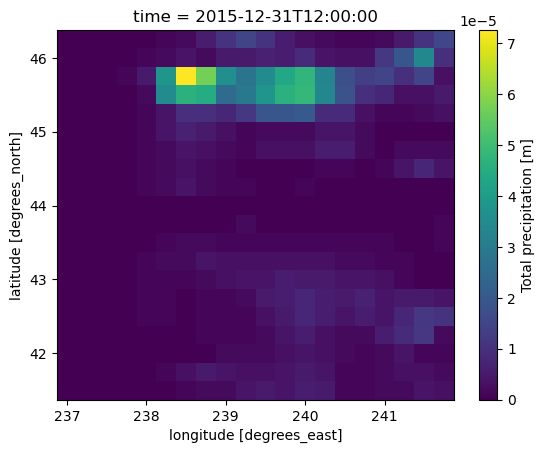

In [16]:
get_event("Oregon", "12-31-2015")

In [ ]:
# cpc global unified gauge based analysis of daily precipitation